In [1]:
#@title Библиотеки

!pip install torch torchvision
!pip install ultralytics
!pip install opencv-python

import os
import yaml
import torch
from IPython.display import display, clear_output, Image
import os
import gdown
import zipfile
from PIL import Image as ImagePIL
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Train images: 1221
Valid images: 261
Test images: 263


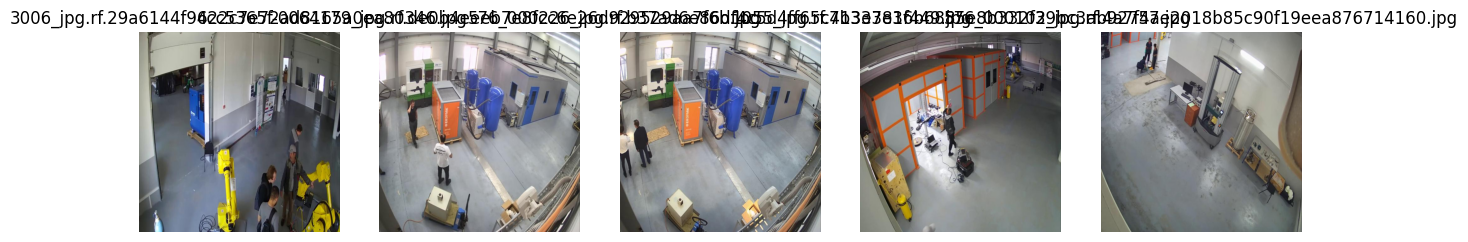

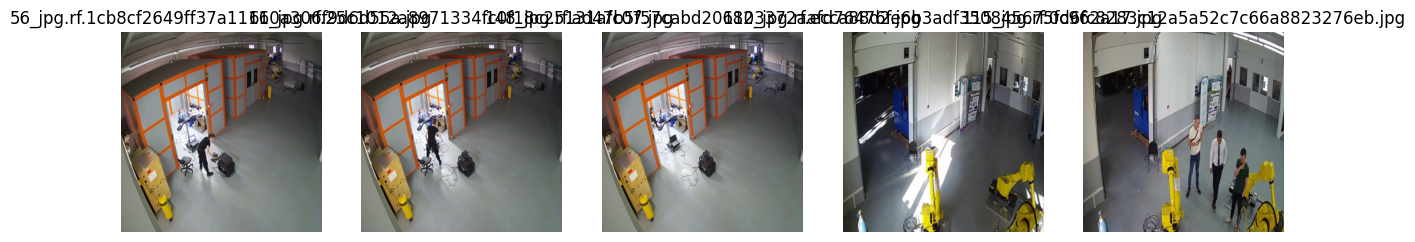

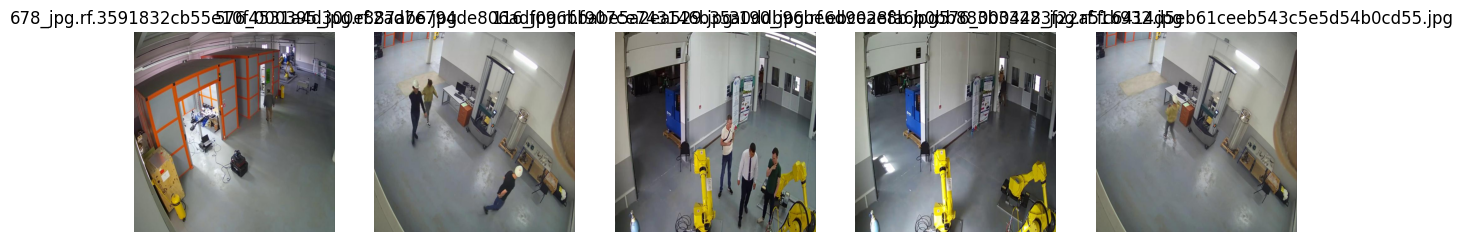

In [3]:
import os
import shutil
import random
import yaml
from multiprocessing import Pool
from functools import partial
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Путь к корневой папке
root_path = '/content/drive/MyDrive/Python_Colab/Train_3_classes_100'

# Пути к папкам с изображениями и аннотациями
images_path = os.path.join(root_path, 'images')
labels_path = os.path.join(root_path, 'labels')

# Загрузка файла data.yaml
with open(os.path.join(root_path, 'data.yaml'), 'r') as yaml_file:
    data = yaml.safe_load(yaml_file)

# Создание папок для train, valid, test
train_path = os.path.join(root_path, 'train')
valid_path = os.path.join(root_path, 'valid')
test_path = os.path.join(root_path, 'test')

# Очистка существующих папок (если они существуют)
for folder in [train_path, valid_path, test_path]:
    shutil.rmtree(folder, ignore_errors=True)
    os.makedirs(os.path.join(folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(folder, 'labels'), exist_ok=True)

# Разделение датасета на train, valid, test
total_images = len(os.listdir(images_path))
p1, p2, p3 = 0.7, 0.15, 0.15  # Пропорции для train, valid, test

indices = list(range(total_images))
random.shuffle(indices)

train_split = int(p1 * total_images)
valid_split = int(p2 * total_images) + train_split

train_indices = indices[:train_split]
valid_indices = indices[train_split:valid_split]
test_indices = indices[valid_split:]

# Копирование изображений и аннотаций в соответствующие папки
def copy_file(index, source_folder, dest_folder):
    image_name = os.listdir(source_folder)[index]
    image_path = os.path.join(source_folder, image_name)
    label_name = image_name.replace('.jpg', '.txt')
    label_path = os.path.join(labels_path, label_name)

    shutil.copy(image_path, os.path.join(dest_folder, 'images', image_name))
    shutil.copy(label_path, os.path.join(dest_folder, 'labels', label_name))

def copy_files(indices, source_folder, dest_folder):
    with Pool() as pool:
        pool.map(partial(copy_file, source_folder=source_folder, dest_folder=dest_folder), indices)

# Копирование файлов для train, valid, test
copy_files(train_indices, images_path, train_path)
copy_files(valid_indices, images_path, valid_path)
copy_files(test_indices, images_path, test_path)

# Вывод количества изображений в каждой папке
print(f"Train images: {len(os.listdir(os.path.join(train_path, 'images')))}")
print(f"Valid images: {len(os.listdir(os.path.join(valid_path, 'images')))}")
print(f"Test images: {len(os.listdir(os.path.join(test_path, 'images')))}")

# Вывод 5 случайных изображений из каждой папки с помощью matplotlib
def display_random_images(folder_path):
    images = os.listdir(os.path.join(folder_path, 'images'))
    random_images = random.sample(images, min(5, len(images)))

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(random_images):
        img_path = os.path.join(folder_path, 'images', image_name)
        plt.subplot(1, 5, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

# Вывод изображений для train, valid, test
display_random_images(train_path)
display_random_images(valid_path)
display_random_images(test_path)
